# Lab | Customer Analysis Round 4

In [1]:
# import libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# load csv file
df1 = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [3]:
# number of rows and columns
df1.shape

(9134, 24)

### 2. Standardize header names.

In [4]:
df1.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
def standard_cols(dataframe):
    '''Standardize column names into lowercase and replace spaces with underscore.'''
    dataframe.columns = [col.lower().replace(' ','_') for col in df1.columns]
standard_cols(df1)
df1.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

### Data Cleaning and EDA

In [7]:
#Rounding off to 2 decimal places
df2 = df1
df2 = round(df2,2)

### Datetime format

In [9]:
def transform_to_date(column):
    column = pd.to_datetime(column, errors='coerce')
    return column
df2.effective_to_date = transform_to_date(df2.effective_to_date)

In [10]:
df2.sample(10)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
5540,MH43755,Arizona,13881.04,No,Premium,College,2011-02-14,Disabled,F,17961,...,51,0,3,Personal Auto,Personal L2,Offer2,Agent,476.71,Sports Car,Medsize
6172,OE56979,Oregon,9551.17,No,Basic,High School or Below,2011-01-18,Employed,F,57016,...,86,0,3,Personal Auto,Personal L2,Offer2,Agent,341.87,SUV,Medsize
6298,OC50447,Nevada,4966.77,No,Basic,Bachelor,2011-02-08,Employed,M,38055,...,24,1,8,Personal Auto,Personal L3,Offer4,Call Center,39.07,Two-Door Car,Medsize
7199,SN53710,Washington,6245.44,No,Extended,High School or Below,2011-01-16,Employed,M,80101,...,8,0,3,Personal Auto,Personal L3,Offer3,Call Center,442.92,Four-Door Car,Medsize
7707,DZ62350,California,2514.28,No,Basic,High School or Below,2011-02-07,Employed,M,24744,...,0,0,1,Personal Auto,Personal L3,Offer4,Call Center,312.00,Four-Door Car,Medsize
3795,KP51068,Oregon,2640.59,No,Basic,Bachelor,2011-02-01,Employed,M,59961,...,7,0,1,Personal Auto,Personal L3,Offer1,Branch,291.92,Four-Door Car,Medsize
4979,NV94455,Arizona,6861.28,No,Basic,College,2011-01-10,Unemployed,F,0,...,21,3,2,Personal Auto,Personal L3,Offer4,Call Center,476.20,Two-Door Car,Medsize
8059,RI76930,California,4163.04,No,Basic,College,2011-02-12,Employed,F,43276,...,11,0,1,Personal Auto,Personal L3,Offer2,Call Center,499.20,SUV,Large
8323,VB23257,Oregon,4652.60,No,Basic,Bachelor,2011-01-05,Employed,M,47590,...,25,0,1,Special Auto,Special L3,Offer1,Branch,121.33,SUV,Medsize
3079,GE50763,Washington,3491.74,No,Premium,Bachelor,2011-01-16,Unemployed,M,0,...,88,0,1,Corporate Auto,Corporate L1,Offer1,Agent,748.80,Four-Door Car,Medsize


In [11]:
df_q1 = df2
df_q1

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize
2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,WW63253,California,7645.86,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,HB64268,Washington,2813.69,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.99,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.23,Four-Door Car,Medsize
9130,PK87824,California,3096.51,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.20,Four-Door Car,Medsize
9131,TD14365,California,8163.89,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.78,Four-Door Car,Medsize
9132,UP19263,California,7524.44,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.20,Four-Door Car,Large


### Describe DataFrame.

In [12]:
df_q1.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940473,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088834
std,6870.967599,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500043
min,1898.010000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.100000
25%,3994.250000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.260000
50%,5780.180000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945000
75%,8962.170000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.515000
max,83325.380000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.240000


### Show a plot of the total number of responses.

<AxesSubplot:xlabel='response', ylabel='Count'>

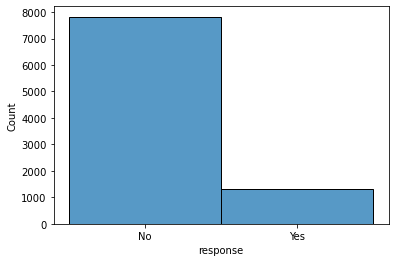

In [84]:
response = df_q1['response']
sns.histplot(response)

In [14]:
response.value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

### Show a plot of the response rate by the sales channel.

Text(0.5, 1.0, 'Percent of Response per Sales Channel')

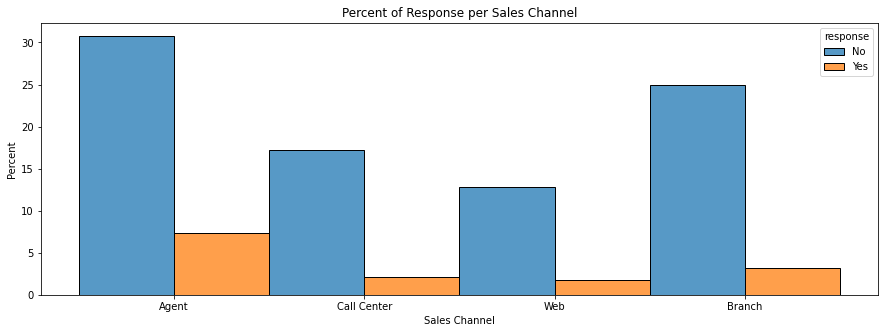

In [85]:
plt.figure(figsize=(15,5))
sns.histplot(data=df_q1, x='sales_channel', hue=response, stat='percent', multiple='dodge')
plt.xlabel('Sales Channel')
plt.title('Percent of Response per Sales Channel')

### 5. Show a plot of the response rate by the total claim amount.

In [92]:
# new dfs separating responses to yes and no
no= df_q1[df_q1['response']=='No']
yes= df_q1[df_q1['response']=='Yes']

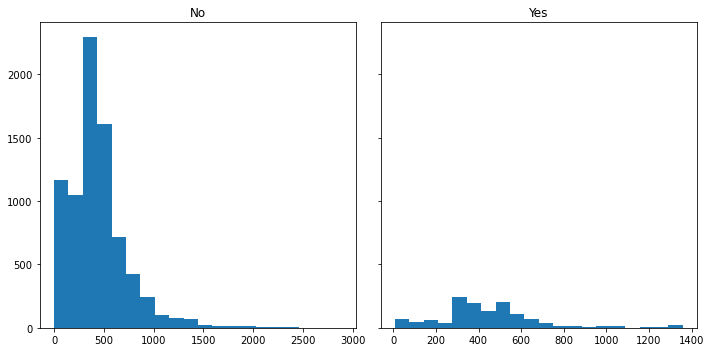

In [101]:
fig, axs = plt.subplots(1,2, sharey=True, tight_layout=True, figsize=(10,5))
axs[0].hist(no['total_claim_amount'], bins=20)
axs[0].title.set_text('No')

axs[1].hist(yes['total_claim_amount'], bins=20)
axs[1].title.set_text('Yes')
plt.show()

<AxesSubplot:xlabel='response', ylabel='total_claim_amount'>

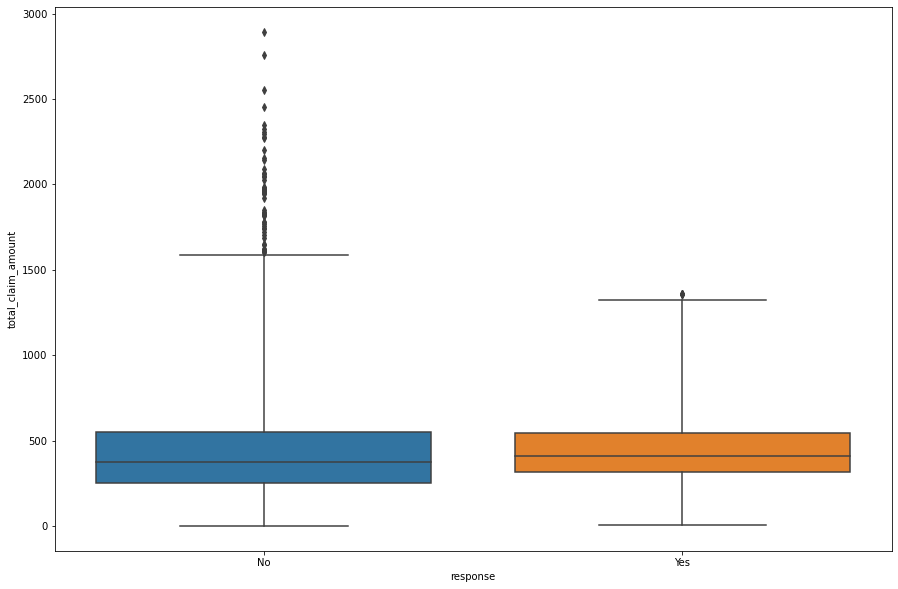

In [94]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_q1, x= 'response', y='total_claim_amount',whis=3.5)

Really wasn't sure which plot made more sense to use so just put both :)

### Show a plot of the response rate by income.

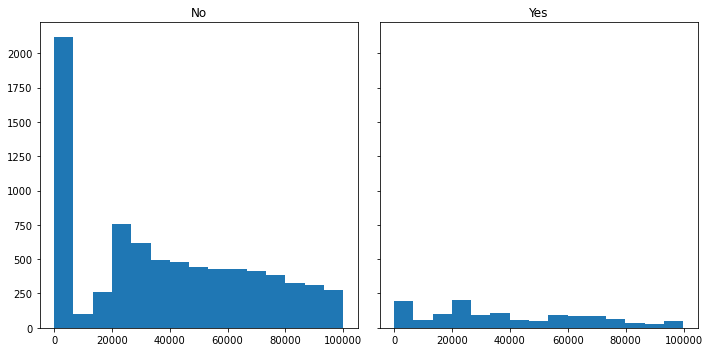

In [95]:
fig, axs = plt.subplots(1,2, tight_layout=True, sharey=True, figsize=(10,5))
axs[0].hist(no['income'], bins=15)
axs[0].title.set_text('No')
axs[1].hist(yes['income'], bins=15)
axs[1].title.set_text('Yes')

plt.show()

<AxesSubplot:xlabel='response', ylabel='income'>

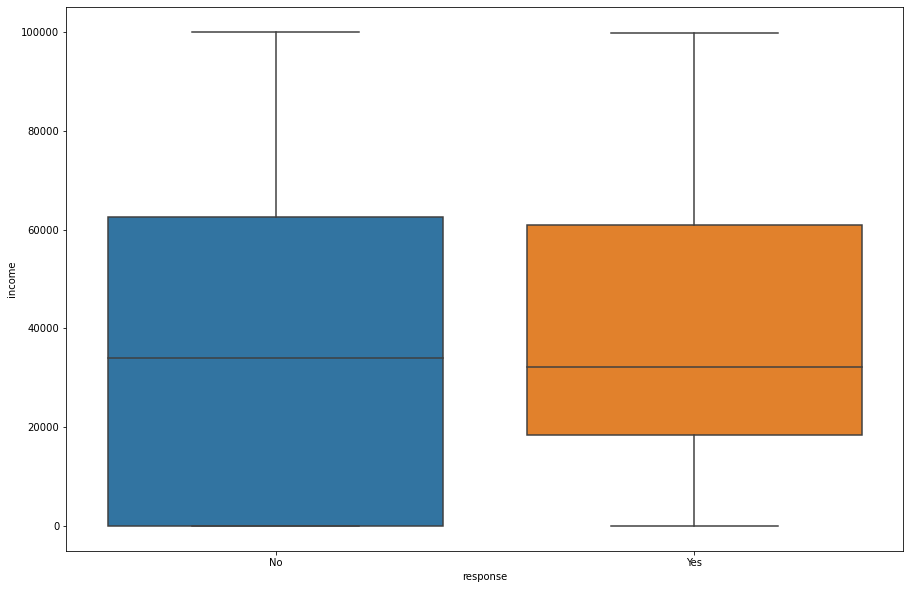

In [96]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_q1, x= 'response', y='income')

# Round 4 | Exercises :

### Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categorical.

In [21]:
df_q1.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [22]:
# Separate numerical and categorical variables
numerical = df_q1.select_dtypes([np.number])
categorical = df_q1.select_dtypes([object])

In [23]:
numerical.info()
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer          9134 non-null   obje

### Visualisation
- Seaborn library to construct distribution plots for the numerical variables

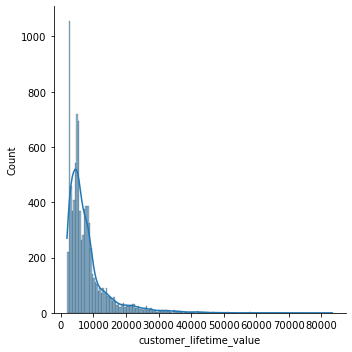

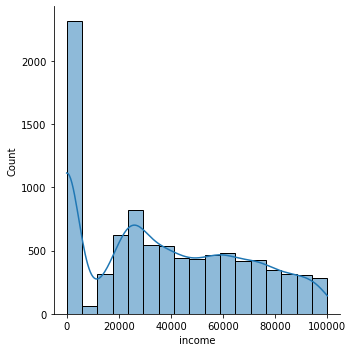

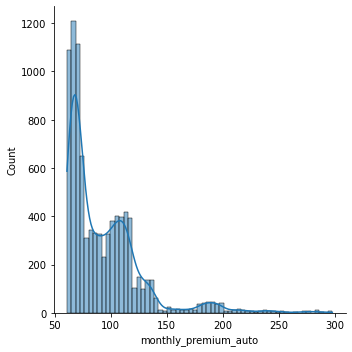

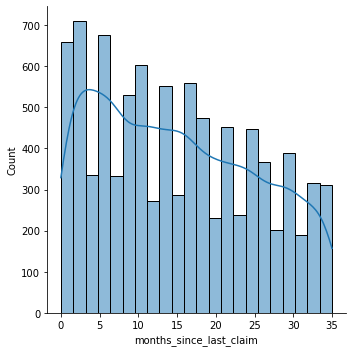

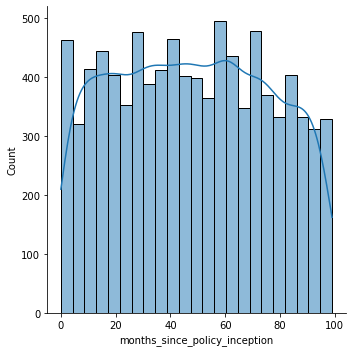

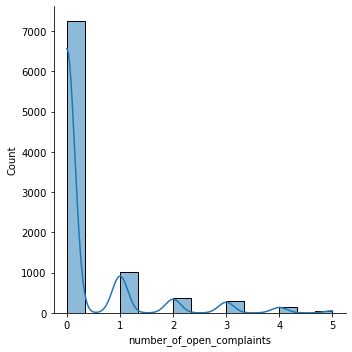

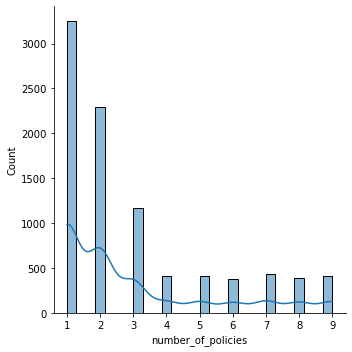

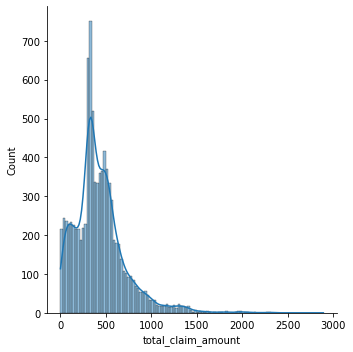

In [30]:
for column in numerical.columns:
    sns.displot(numerical[column], kde=True)
    plt.show()

- Matplotlib to construct histograms

In [41]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

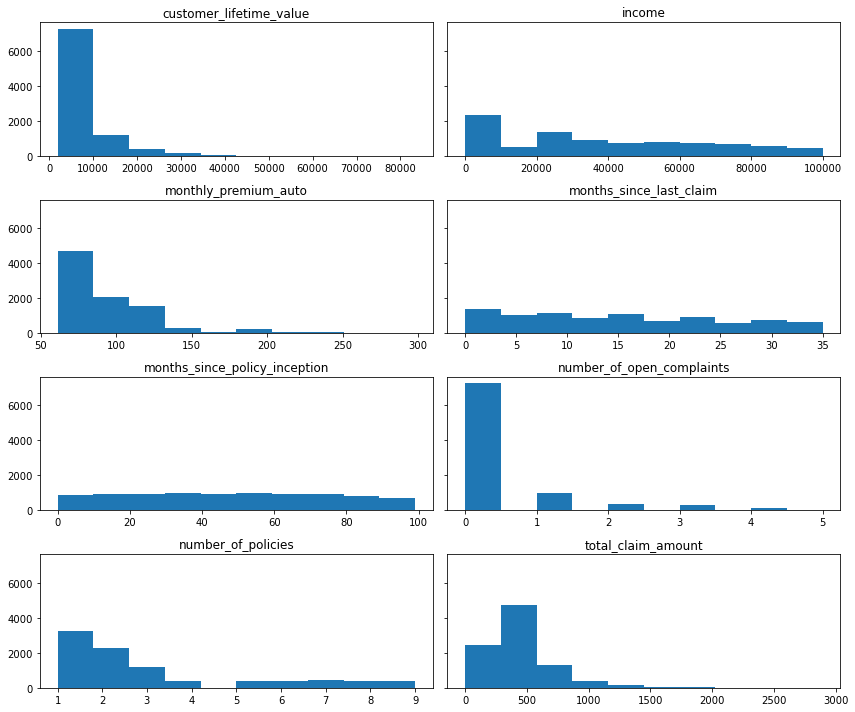

In [71]:
fig, axs = plt.subplots(4,2, sharey=True, tight_layout=True, figsize=(12,10))

axs[0,0].hist(numerical['customer_lifetime_value'])
axs[0,0].title.set_text('customer_lifetime_value')

axs[0,1].hist(numerical['income'])
axs[0,1].title.set_text('income')

axs[1,0].hist(numerical['monthly_premium_auto'])
axs[1,0].title.set_text('monthly_premium_auto')

axs[1,1].hist(numerical['months_since_last_claim'])
axs[1,1].title.set_text('months_since_last_claim')

axs[2,0].hist(numerical['months_since_policy_inception'])
axs[2,0].title.set_text('months_since_policy_inception')

axs[2,1].hist(numerical['number_of_open_complaints'])
axs[2,1].title.set_text('number_of_open_complaints')

axs[3,0].hist(numerical['number_of_policies'])
axs[3,0].title.set_text('number_of_policies')

axs[3,1].hist(numerical['total_claim_amount'])
axs[3,1].title.set_text('total_claim_amount')



- Do the distributions for different numerical variables look like a normal distribution: Maybe the total_claim_amount

### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features.

<AxesSubplot:>

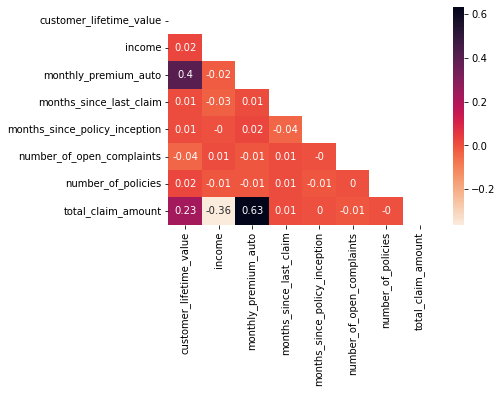

In [97]:
corr_num=round(numerical.corr(),2)
mask = np.zeros_like(corr_num)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_num, annot=True, cmap='rocket_r', mask=mask)